In [2]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

import re
import os, os.path

# Data Cleaning & Feature Engineering

In [13]:
raw_df = pd.read_csv('jobstreet_ds_raw.csv')
raw_df.head()

,location,title,company,salary,summary,job_url
0,National Capital Reg,Urgent HIring! DATA ANALYST,Asalus Corporation (IntelliCare),NaN,A DATA ANALYST are in charge of generating dat...,https://www.jobstreet.com.ph/en/job/urgent-hir...
1,Taguig City,Senior Data Analyst (Automation),Uber Philippines (Center of Excellence),NaN,About the Role\nThis role is part of the APAC ...,https://www.jobstreet.com.ph/en/job/senior-dat...
2,"Cebu (Cebu City), Manila City",Data Science Manager,"Gothong Southern Shipping Lines, Inc.",NaN,Responsible for lead and direct the Data Scien...,https://www.jobstreet.com.ph/en/job/data-scien...
3,Quezon City,Data Engineer (Python Developer),REED ELSEVIER SHARED SERVICES (PHILIPPINES) INC.,NaN,QUALIFICATIONS:\n• 3+ years’ experience in ETL...,https://www.jobstreet.com.ph/en/job/data-engin...
4,National Capital Reg,Senior Business Data Analyst - US Support (Nig...,"TTEC Customer Care Management Phils., Inc.",PHP 80K - 112K monthly,"Senior Business Data Analyst\nAt TTEC Digital,...",https://www.jobstreet.com.ph/en/job/senior-bus...


In [23]:
raw_df = raw_df.fillna(0)

In [45]:
raw_df.company.value_counts()

Accenture                                                              547
YONDU INC.                                                             100
Las Piñas General Hospital and Satellite Trauma Center - Government     78
Provincial Government of Pangasinan - Government                        65
Asticom Technology Inc                                                  63
                                                                      ... 
Workcentric Solutions Consulting Inc.                                    1
Ramon F. Garcia & Company, CPAs'                                         1
Australian Outsource Desk, Inc. (AODESK, Inc.)                           1
iRely-Philippines, Inc.                                                  1
Asalus Corporation (IntelliCare)                                         1
Name: company, Length: 977, dtype: int64

In [47]:
periods = ['hour','day', 'week', 'month', 'year']

for period in periods:
    matches = raw_df.salary.str.lower().str.contains(period).sum()
    print(f'{period}: {matches}')

hour: 0
day: 0
week: 0
month: 1276
year: 0


In [92]:
test_line = 0
# 'PHP 120K - 180K monthly'

def get_average_salary(salary_str):

    a = salary_str.split(' - ')

    if len(a) == 2:
        new_salary = np.mean([int(b) for b in a])
    
    else:
        new_salary = (int(a[0]))

    return new_salary * 1000

def get_monthly_ave(salary_str):

    if type(salary_str) == int or type(salary_str) == float:
        return int(salary_str)
    
    else:
        replacements = [
            ('PHP ', ''),
            (',', ''),
            ('K', '')
        ]

        key = " monthly"

        for old, new in replacements:
            salary_str = re.sub(old, new, salary_str)

        if re.search(key, salary_str):
            salary_str = re.sub(key, '', salary_str)
            new_salary = get_average_salary(salary_str)

        elif re.search(' a year', salary_str):
            salary_str = re.sub(' a year', '', salary_str)
            new_salary = get_average_salary(salary_str)/12

        else:
            new_salary = 'something is wrong'

        return new_salary

get_monthly_ave(test_line)

0

In [101]:
raw_df.salary = raw_df.salary.apply(get_monthly_ave)
raw_df.summary = raw_df.summary.astype(str)
raw_df.summary = raw_df.summary.str.replace('\n', ' ')
raw_df.head(5)

,location,title,company,salary,summary,job_url
0,National Capital Reg,Urgent HIring! DATA ANALYST,Asalus Corporation (IntelliCare),0,A DATA ANALYST are in charge of generating dat...,https://www.jobstreet.com.ph/en/job/urgent-hir...
1,Taguig City,Senior Data Analyst (Automation),Uber Philippines (Center of Excellence),0,About the Role This role is part of the APAC A...,https://www.jobstreet.com.ph/en/job/senior-dat...
2,"Cebu (Cebu City), Manila City",Data Science Manager,"Gothong Southern Shipping Lines, Inc.",0,Responsible for lead and direct the Data Scien...,https://www.jobstreet.com.ph/en/job/data-scien...
3,Quezon City,Data Engineer (Python Developer),REED ELSEVIER SHARED SERVICES (PHILIPPINES) INC.,0,QUALIFICATIONS: • 3+ years’ experience in ETL/...,https://www.jobstreet.com.ph/en/job/data-engin...
4,National Capital Reg,Senior Business Data Analyst - US Support (Nig...,"TTEC Customer Care Management Phils., Inc.",96000,"Senior Business Data Analyst At TTEC Digital, ...",https://www.jobstreet.com.ph/en/job/senior-bus...


Create a series that indicates if teh job is remote work or not

In [148]:
for i in range(1, len(raw_df), 1):
    for series in [ 'summary', 'location', 'title' ]:

        if raw_df.at[i, 'is_remote'] != True:
            if re.search( "remote" , raw_df.at[i, series].lower()):
                raw_df.at[i, 'is_remote'] = True
        else:
            continue

raw_df.head(3)

,location,title,company,salary,summary,job_url,is_remote
0,National Capital Reg,Urgent HIring! DATA ANALYST,Asalus Corporation (IntelliCare),0,A DATA ANALYST are in charge of generating dat...,https://www.jobstreet.com.ph/en/job/urgent-hir...,False
1,Taguig City,Senior Data Analyst (Automation),Uber Philippines (Center of Excellence),0,About the Role This role is part of the APAC A...,https://www.jobstreet.com.ph/en/job/senior-dat...,True
2,"Cebu (Cebu City), Manila City",Data Science Manager,"Gothong Southern Shipping Lines, Inc.",0,Responsible for lead and direct the Data Scien...,https://www.jobstreet.com.ph/en/job/data-scien...,False


Check if there are any DS related skills in the summary

In [154]:
import pickle

with open('ds_skills.pickle', 'rb') as handle:
    ds_skills = pickle.load(handle)

print((ds_skills))

['a.i', 'agile', 'ai', 'algorithms', 'analysis', 'automation', 'aws', 'azure', 'c+', 'c++', 'data analysis', 'data mining', 'data wrangling', 'deep learning', 'deployment', 'dl', 'etl', 'forecast', 'forecasting', 'hive', 'machine learning', 'mathematics', 'ml', 'modelling', 'mysql', 'natural language', 'nlp', 'nosql', 'numpy', 'pandas', 'phd', 'power b.i', 'powerbi', 'python', 'regression', 'sas', 'spark', 'sql', 'statistics', 'tableau', 'time series', 'visualization']


In [156]:
def skill_extractor(summary):

    test_list = []

    for word in summary.split():

        clean_word = word.lower().strip(' ,.!?')

        if clean_word in ds_skills:
            test_list.append(clean_word)

    test_list = list(dict.fromkeys(test_list))
    return test_list

In [157]:
raw_df['skill_matches'] = raw_df.summary.apply(skill_extractor)
raw_df.head()

,location,title,company,salary,summary,job_url,is_remote,skill_matches
0,National Capital Reg,Urgent HIring! DATA ANALYST,Asalus Corporation (IntelliCare),0,A DATA ANALYST are in charge of generating dat...,https://www.jobstreet.com.ph/en/job/urgent-hir...,False,"[mathematics, statistics]"
1,Taguig City,Senior Data Analyst (Automation),Uber Philippines (Center of Excellence),0,About the Role This role is part of the APAC A...,https://www.jobstreet.com.ph/en/job/senior-dat...,True,"[automation, sql, analysis, python, pandas, nu..."
2,"Cebu (Cebu City), Manila City",Data Science Manager,"Gothong Southern Shipping Lines, Inc.",0,Responsible for lead and direct the Data Scien...,https://www.jobstreet.com.ph/en/job/data-scien...,False,"[forecast, algorithms, ml, analysis, regressio..."
3,Quezon City,Data Engineer (Python Developer),REED ELSEVIER SHARED SERVICES (PHILIPPINES) INC.,0,QUALIFICATIONS: • 3+ years’ experience in ETL/...,https://www.jobstreet.com.ph/en/job/data-engin...,False,"[sql, python, etl, aws, automation, agile]"
4,National Capital Reg,Senior Business Data Analyst - US Support (Nig...,"TTEC Customer Care Management Phils., Inc.",96000,"Senior Business Data Analyst At TTEC Digital, ...",https://www.jobstreet.com.ph/en/job/senior-bus...,False,"[analysis, sql, statistics, sas, python]"


In [158]:
def has_skills(skill_list):
    if len(skill_list) != 0:
        return True
    else:
        return False

raw_df['has_skills'] = raw_df.skill_matches.apply(has_skills)
raw_df.head()

,location,title,company,salary,summary,job_url,is_remote,skill_matches,has_skills
0,National Capital Reg,Urgent HIring! DATA ANALYST,Asalus Corporation (IntelliCare),0,A DATA ANALYST are in charge of generating dat...,https://www.jobstreet.com.ph/en/job/urgent-hir...,False,"[mathematics, statistics]",True
1,Taguig City,Senior Data Analyst (Automation),Uber Philippines (Center of Excellence),0,About the Role This role is part of the APAC A...,https://www.jobstreet.com.ph/en/job/senior-dat...,True,"[automation, sql, analysis, python, pandas, nu...",True
2,"Cebu (Cebu City), Manila City",Data Science Manager,"Gothong Southern Shipping Lines, Inc.",0,Responsible for lead and direct the Data Scien...,https://www.jobstreet.com.ph/en/job/data-scien...,False,"[forecast, algorithms, ml, analysis, regressio...",True
3,Quezon City,Data Engineer (Python Developer),REED ELSEVIER SHARED SERVICES (PHILIPPINES) INC.,0,QUALIFICATIONS: • 3+ years’ experience in ETL/...,https://www.jobstreet.com.ph/en/job/data-engin...,False,"[sql, python, etl, aws, automation, agile]",True
4,National Capital Reg,Senior Business Data Analyst - US Support (Nig...,"TTEC Customer Care Management Phils., Inc.",96000,"Senior Business Data Analyst At TTEC Digital, ...",https://www.jobstreet.com.ph/en/job/senior-bus...,False,"[analysis, sql, statistics, sas, python]",True


clean_df the the full scraped data_set with a bit of cleaning and feature engineering

In [162]:
clean_df = raw_df
clean_df.to_csv('jobstreet/clean_data')

get a df with full salary & summary details

In [218]:
# we assume that there is only one job opening for the same company in the same company per office location

full_df = clean_df[
    (clean_df.salary != 0) 
    & (clean_df.summary != "0")
    & (clean_df.has_skills == True)
]

full_df = full_df[~full_df[['location','summary']].duplicated()].reset_index(drop=True)

In [217]:
full_df

,location,title,company,salary,summary,job_url,is_remote,skill_matches,has_skills
0,National Capital Reg,Senior Business Data Analyst - US Support (Nig...,"TTEC Customer Care Management Phils., Inc.",96000,"Senior Business Data Analyst At TTEC Digital, ...",https://www.jobstreet.com.ph/en/job/senior-bus...,False,"[analysis, sql, statistics, sas, python]",True
1,Makati City,Data Scientist,Getz Clinical Phils. ROHQ,65000,Getz Clinical is a global technology company t...,https://www.jobstreet.com.ph/en/job/data-scien...,False,"[statistics, python, sql, modelling, regressio...",True
2,Makati City,Data Scientist,Chromelab Technologies Inc.,39500,Responsibilities: Application of AI- Machine L...,https://www.jobstreet.com.ph/en/job/data-scien...,False,"[analysis, mathematics, statistics, python, vi...",True
3,National Capital Reg,Python Developer,"Bolton International, Inc.",62500,WHAT YOU WILL DO: Work closely with other Deve...,https://www.jobstreet.com.ph/en/job/python-dev...,False,"[agile, python, sql, algorithms, analysis]",True
4,National Capital Reg,Data Scientist,Kayamo Atlas Lending Corp.,72000,"To be successful in this role, you will need t...",https://www.jobstreet.com.ph/en/job/data-scien...,False,"[python, sql, algorithms, regression, analysis]",True
...,...,...,...,...,...,...,...,...,...
473,National Capital Reg,Software Engineer,GHL Systems Philippines Inc.,60000,"Develops information systems by designing, dev...",https://www.jobstreet.com.ph/en/job/software-e...,False,[analysis],True
475,National Capital Reg,Process Improvement - Learning and Development,PRIMELINE PRODUCTS PHILIPPINES INC.,23500,Job Responsibilities: Process Improvement Resp...,https://www.jobstreet.com.ph/en/job/process-im...,False,[analysis],True
476,Taguig City,Quality Assurance Analyst,"Sysgen RPO, Inc.",120000,Responsibilities Create and maintain detailed ...,https://www.jobstreet.com.ph/en/job/quality-as...,False,"[regression, sql, agile]",True
477,Mandaluyong City,Purchasing and Accounting Assistant,Tradezilla Corp,20500,Purchasing and Accounting Assistant Main respo...,https://www.jobstreet.com.ph/en/job/purchasing...,False,[mathematics],True


In [ ]:
#ffe17d

<div><span style="background-color: #8502ff; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Insight #1 </span></div>

There are 146 data science remote data science jobs 

but only 42 of them have salary info (28.76%)

In [231]:
remote_ds_jobs = len(clean_df[
    (clean_df.is_remote == True) 
    & (clean_df.summary != "0")
    & (clean_df.has_skills == True)
    & (~clean_df[['location','summary']].duplicated())
])

In [230]:
remote_ds_jobs_with_salary = len(clean_df[
    (clean_df.is_remote == True) 
    & (clean_df.summary != "0")
    & (clean_df.has_skills == True)
    & (~clean_df[['location','summary']].duplicated())
    & (clean_df.salary != 0)
])

In [232]:
remote_ds_jobs_with_salary / remote_ds_jobs

0.2876712328767123

# Salary comparisons

overall salary histogram

In [248]:
(full_df[full_df.salary > 100000])

,location,title,company,salary,summary,job_url,is_remote,skill_matches,has_skills
9,"Makati City, Pasig City, Cebu (Others), ,",Data Architect (DataBricks),Complete Development (CoDev),125000,CoDev | Data Architect/ Data Bricks Architect ...,https://www.jobstreet.com.ph/en/job/data-archi...,False,"[deployment, azure]",True
12,Paranaque City,Data Engineer,Solaire Resort & Casino,108000,Job Responsibilities Collect datasets that ali...,https://www.jobstreet.com.ph/en/job/data-engin...,False,"[algorithms, automation, aws, analysis, spark,...",True
15,National Capital Reg,Azure Data Engineer (Remote work - night shift),"Sysgen RPO, Inc.",115000,About the job: Direct hire with client/ Compan...,https://www.jobstreet.com.ph/en/job/azure-data...,True,"[azure, sql]",True
18,National Capital Reg,Data Engineer,Asticom Technology Inc,102500,Job Responsibilities: Create and maintain opti...,https://www.jobstreet.com.ph/en/job/data-engin...,False,"[sql, aws, analysis, statistics, nosql, python...",True
21,"Central Luzon, Manila City",Senior Python Developer,"TwistResources, Inc.",110000,BENEFITS: HMO on the first day Medicine Allowa...,https://www.jobstreet.com.ph/en/job/senior-pyt...,False,"[python, azure, aws, tableau, powerbi]",True
...,...,...,...,...,...,...,...,...,...
435,Taguig City,Agile Manager,Prime Manpower (A ManpowerGroup Affiliate),170000,AGILE MANAGER · Handle various respon...,https://www.jobstreet.com.ph/en/job/agile-mana...,False,[agile],True
437,National Capital Reg,Lead Full Stack Developers - REMOTE,Curran Daly & Associates,250000,Open for: Lead Full Stack Developer - BE bias ...,https://www.jobstreet.com.ph/en/job/lead-full-...,True,"[aws, deployment]",True
445,Makati City,Senior PHP and Vanilla JavaScript Developer,Hero Teams PTY Ltd,175000,Role: Full Stack Developer Front-end: Vanilla ...,https://www.jobstreet.com.ph/en/job/senior-php...,False,"[agile, analysis, mysql]",True
455,Taguig City,Quality Assurance Analyst,"Sysgen RPO, Inc.",120000,Responsibilities Create and maintain detailed ...,https://www.jobstreet.com.ph/en/job/quality-as...,False,"[regression, sql, agile]",True


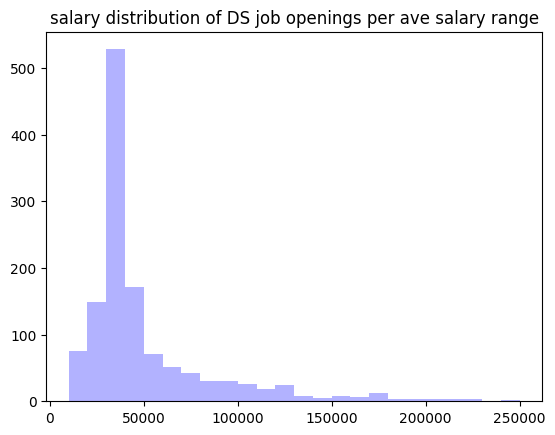

In [261]:
min_sal = 10000
max_sal = 250000
binwdith = 10000


plt.hist(raw_df.salary, bins=np.arange(min_sal, max_sal + binwdith, binwdith), alpha=0.3, color='blue')

plt.title('salary distribution of DS job openings per ave salary range');


most job openings are at the 20 - 30k range

In [268]:
len(
    full_df[full_df.salary < 30000]

)

63

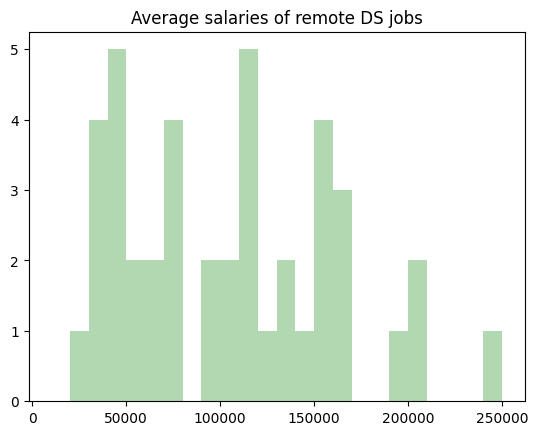

In [263]:
plt.hist(
    full_df[full_df.is_remote == True].salary, 
    bins=np.arange(min_sal, max_sal + binwdith, binwdith), 
    alpha=0.3, 
    color='green');


plt.title('Average salaries of remote DS jobs');

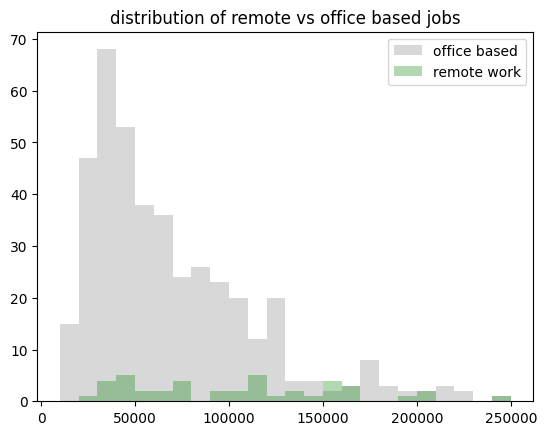

In [253]:
plt.hist(full_df[full_df.is_remote == False].salary,  bins=np.arange(min_sal, max_sal + binwdith, binwdith) , alpha=0.3, color='grey')
plt.hist(full_df[full_df.is_remote == True].salary, bins=np.arange(min_sal, max_sal + binwdith, binwdith), alpha=0.3, color='green')


plt.legend(['office based', 'remote work'])
plt.title('distribution of remote vs office based jobs');

comparing remote vs non-remote salaries

# Word Clouds

In [289]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

from PIL import Image


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


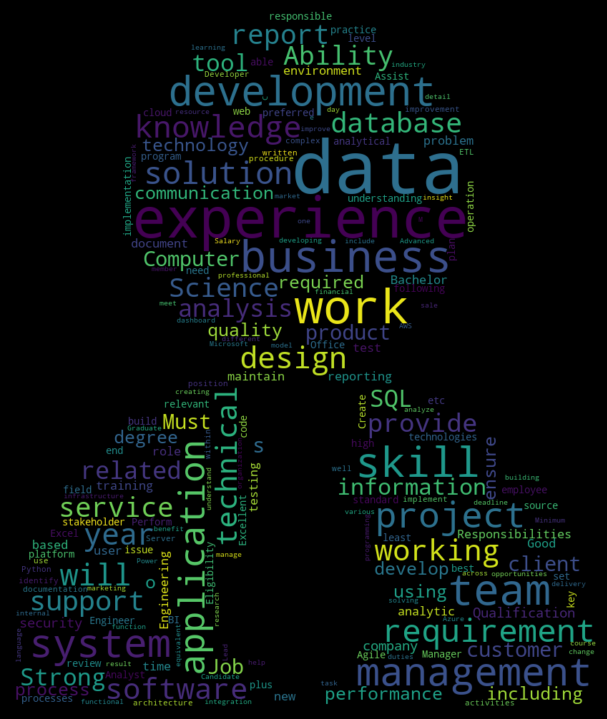

In [314]:
job_mask = np.array(Image.open('masks/job1.png'))

words = []
for phrase in full_df.summary.values:
    for word in phrase.split():
        words.append(word)
word_list = ' '.join(words)

stop_words = stopwords.words('english')
stop_words = set(stop_words)

wordcloud = WordCloud(background_color='black',
                      collocations=False, contour_width=2,
                      mask=job_mask
                     ).generate(word_list)

plt.figure(figsize=(8, 7), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0);

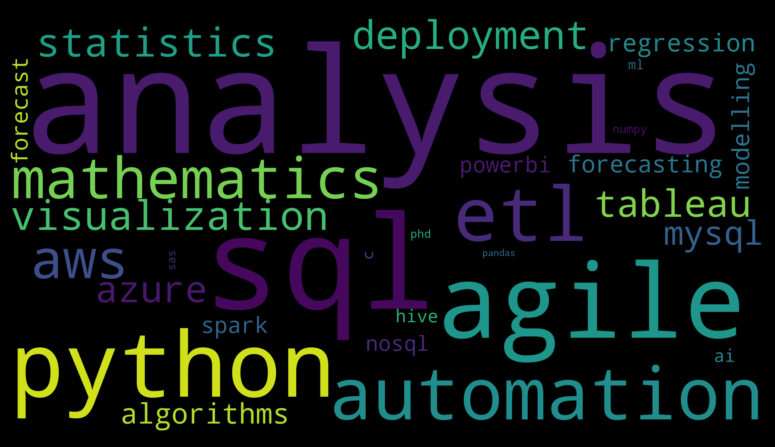

In [313]:
skill_mask = np.array(Image.open('masks/skills1.png'))

words = []
for skills in full_df.skill_matches.values:
    for word in skills:
        words.append(word)
skill_match_list = ' '.join(words)

stop_words = stopwords.words('english')
stop_words = set(stop_words)

wordcloud = WordCloud(background_color='black',
                      collocations=False, contour_width=2,
                      mask=skill_mask
                     ).generate(skill_match_list)

plt.figure(figsize=(8, 7), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.axis('off');


# Feature Importance